In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import sqlite3
import opendatasets as od
import ipdb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "data", "arrestdata.sqlite")
conn = sqlite3.connect(Sqlfilepath1)
# print(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM arrestdata;"
arrest_df = pd.read_sql_query(query, conn)
# print(arrest_df)

Sqlfilepath2 = os.path.join(os.getcwd(), "data", "crimedata.sqlite")
conn = sqlite3.connect(Sqlfilepath2)
# print(Sqlfilepath2)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM crimedata;"
crimedata_df = pd.read_sql_query(query, conn)
# print(death_df)


# Close the connection
conn.close()

In [3]:
print(arrest_df.head(5))
print(crimedata_df.head(5))

   Report ID Report Type             Arrest Date  Time  Area ID    Area Name  \
0    6636966     BOOKING  07/06/2023 12:00:00 AM  2250        8      West LA   
1    6637119     BOOKING  07/07/2023 12:00:00 AM  1000        3    Southwest   
2    6624479     BOOKING  06/15/2023 12:00:00 AM  1850        7     Wilshire   
3    6636128     BOOKING  07/05/2023 12:00:00 AM  1550        2      Rampart   
4    6636650     BOOKING  07/06/2023 12:00:00 AM  1335       12  77th Street   

   Reporting District  Age Sex Code Descent Code  ...  \
0                 817   46        M            B  ...   
1                 396   39        M            B  ...   
2                 724   33        F            H  ...   
3                 218   30        F            B  ...   
4                1258   31        M            H  ...   

       Disposition Description                                  Address  \
0  MISDEMEANOR COMPLAINT FILED   900    GAYLEY                       AV   
1  MISDEMEANOR COMPLAINT F

In [4]:
import pandas as pd

# Assuming 'arrest_df' is your DataFrame
# Define the columns to keep
columns_to_keep = ['Report ID', 'Report Type', 'Arrest Date', 'Time', 'Area ID', 'Area Name', 'Sex Code', 'Age', 'Charge Group Description', 'Address']

# Filter the DataFrame to include only the specified columns
filtered_df = arrest_df[columns_to_keep]

# Extract the year from the 'Arrest Date' column and create a new column 'Arrest Year'
filtered_df['Arrest Year'] = pd.to_datetime(filtered_df['Arrest Date']).dt.year

# Display the first 5 rows of the updated DataFrame
print(filtered_df.head(5))


   Report ID Report Type             Arrest Date  Time  Area ID    Area Name  \
0    6636966     BOOKING  07/06/2023 12:00:00 AM  2250        8      West LA   
1    6637119     BOOKING  07/07/2023 12:00:00 AM  1000        3    Southwest   
2    6624479     BOOKING  06/15/2023 12:00:00 AM  1850        7     Wilshire   
3    6636128     BOOKING  07/05/2023 12:00:00 AM  1550        2      Rampart   
4    6636650     BOOKING  07/06/2023 12:00:00 AM  1335       12  77th Street   

  Sex Code  Age        Charge Group Description  \
0        M   46              Aggravated Assault   
1        M   39          Sex (except rape/prst)   
2        F   33                         Larceny   
3        F   30  Miscellaneous Other Violations   
4        M   31             Weapon (carry/poss)   

                                   Address  Arrest Year  
0   900    GAYLEY                       AV         2023  
1          40TH                         PL         2023  
2   100    THE GROVE                  

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\2702216484.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['Arrest Year'] = pd.to_datetime(filtered_df['Arrest Date']).dt.year
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\2702216484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Arrest Year'] = pd.to_datetime(filtered_df['Arrest Date']).dt.year


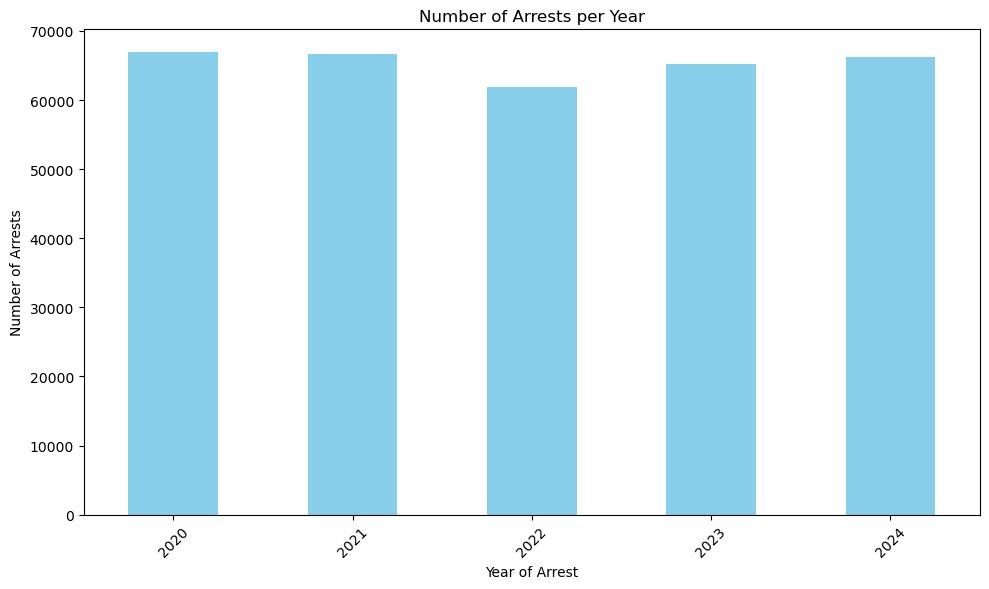

In [5]:
import matplotlib.pyplot as plt

# Group by 'Arrest Year' and count the number of arrests
arrest_counts = filtered_df['Arrest Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
arrest_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Year of Arrest')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Year')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
age_bins = [0, 16, 30, 45, 100]
age_labels = ['Child', 'Young Adult', 'Middle Aged Adult', 'Old Aged Adult']

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\1160574944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)


<Figure size 1200x700 with 0 Axes>

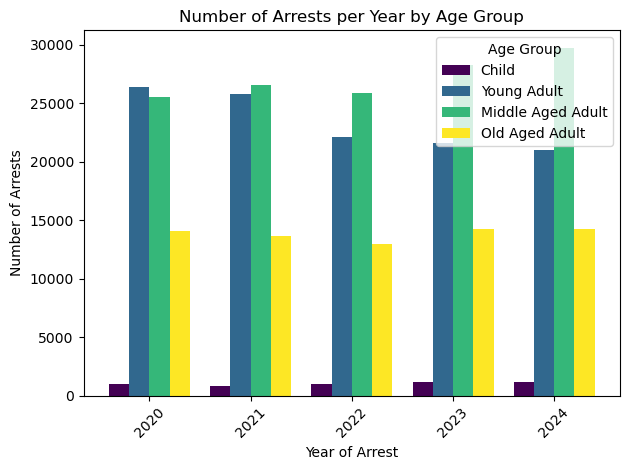

In [10]:
# Create age groups based on the provided bins and labels
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Arrest Year' and 'Age Group' to count the arrests
arrest_counts_by_age = filtered_df.groupby(['Arrest Year', 'Age Group']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 7))
arrest_counts_by_age.plot(kind='bar', colormap='viridis', width=0.8)

# Adding labels and title
plt.xlabel('Year of Arrest')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Year by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Age Group')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\4047733797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sex Code'] = filtered_df['Sex Code'].replace({'M': 'Male', 'F': 'Female'})


<Figure size 1200x700 with 0 Axes>

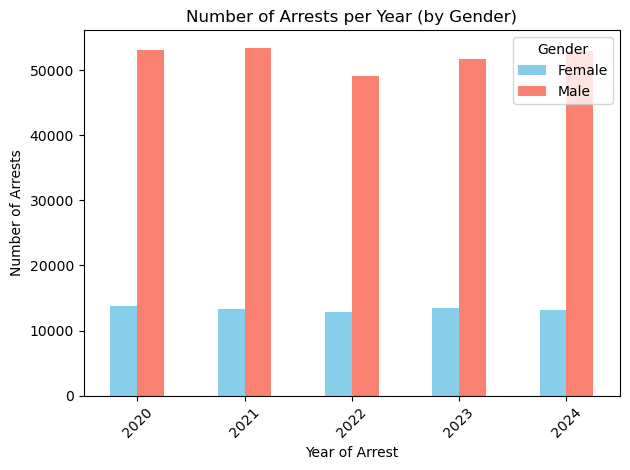

In [11]:
import matplotlib.pyplot as plt

# Convert 'Sex Code' to more readable labels (M = Male, F = Female)
filtered_df['Sex Code'] = filtered_df['Sex Code'].replace({'M': 'Male', 'F': 'Female'})

# Group by 'Arrest Year' and 'Sex Code', and count the number of arrests
arrest_counts_by_gender = filtered_df.groupby(['Arrest Year', 'Sex Code']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 7))
arrest_counts_by_gender.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Adding labels and title
plt.xlabel('Year of Arrest')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Year (by Gender)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\2124944154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)


<Figure size 1200x700 with 0 Axes>

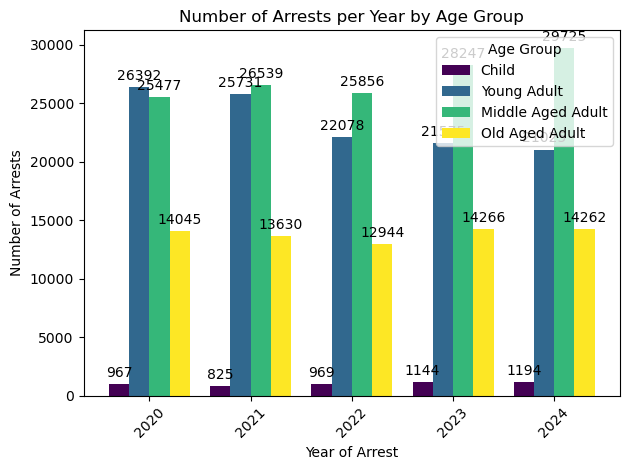

In [12]:
# Create age groups based on the provided bins and labels
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Arrest Year' and 'Age Group' to count the arrests
arrest_counts_by_age = filtered_df.groupby(['Arrest Year', 'Age Group']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 7))
ax = arrest_counts_by_age.plot(kind='bar', colormap='viridis', width=0.8)

# Adding labels to each bar (numerical values)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Adding labels and title
plt.xlabel('Year of Arrest')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Year by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Age Group')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\89342713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)


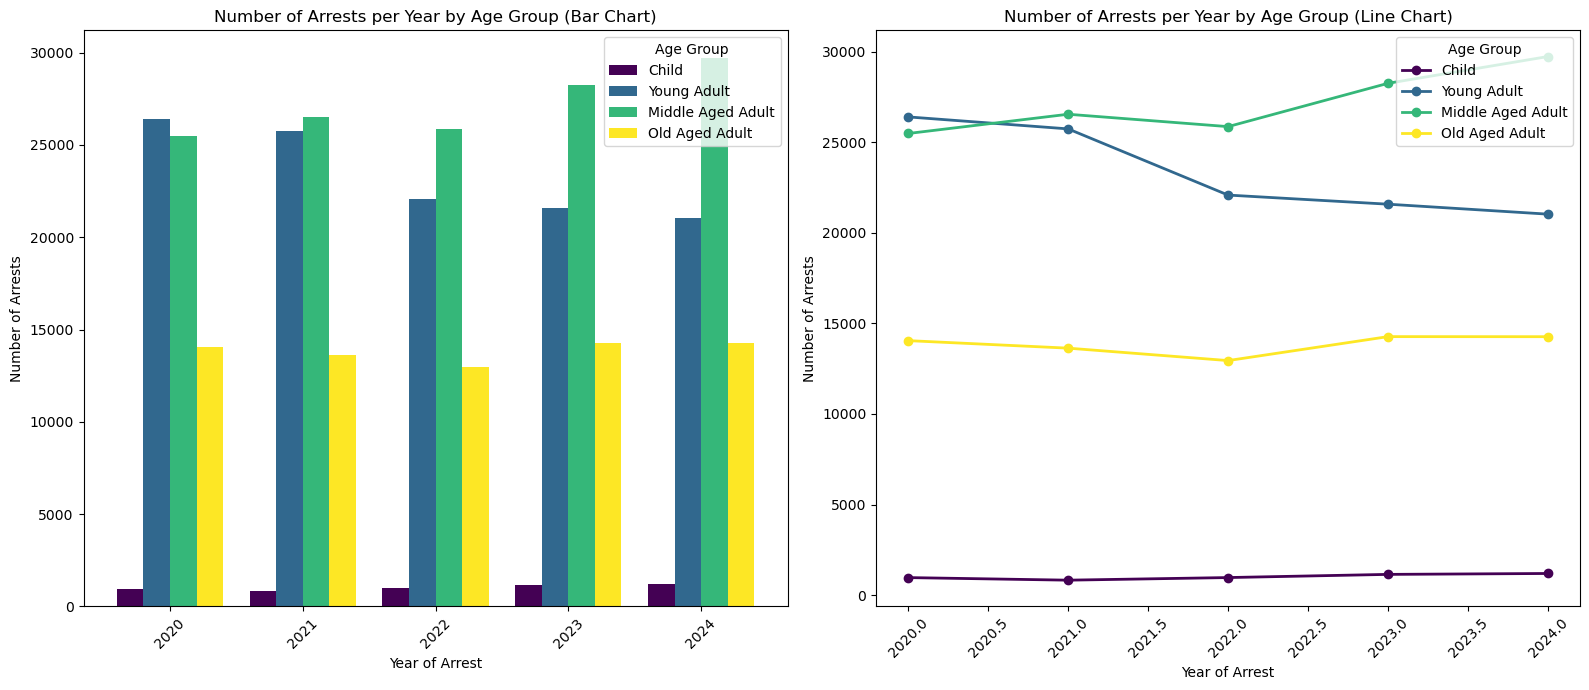

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Create age groups based on the provided bins and labels
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Arrest Year' and 'Age Group' to count the arrests
arrest_counts_by_age = filtered_df.groupby(['Arrest Year', 'Age Group']).size().unstack(fill_value=0)

# Filter to keep only full years (integer years)
arrest_counts_by_age = arrest_counts_by_age[arrest_counts_by_age.index % 1 == 0]

# Plotting bar and line graphs side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Bar graph
arrest_counts_by_age.plot(kind='bar', colormap='viridis', width=0.8, ax=ax[0])
ax[0].set_title('Number of Arrests per Year by Age Group (Bar Chart)')
ax[0].set_xlabel('Year of Arrest')
ax[0].set_ylabel('Number of Arrests')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Age Group')

# Line graph
arrest_counts_by_age.plot(kind='line', colormap='viridis', marker='o', linewidth=2, ax=ax[1])
ax[1].set_title('Number of Arrests per Year by Age Group (Line Chart)')
ax[1].set_xlabel('Year of Arrest')
ax[1].set_ylabel('Number of Arrests')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Age Group')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\2432501159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)


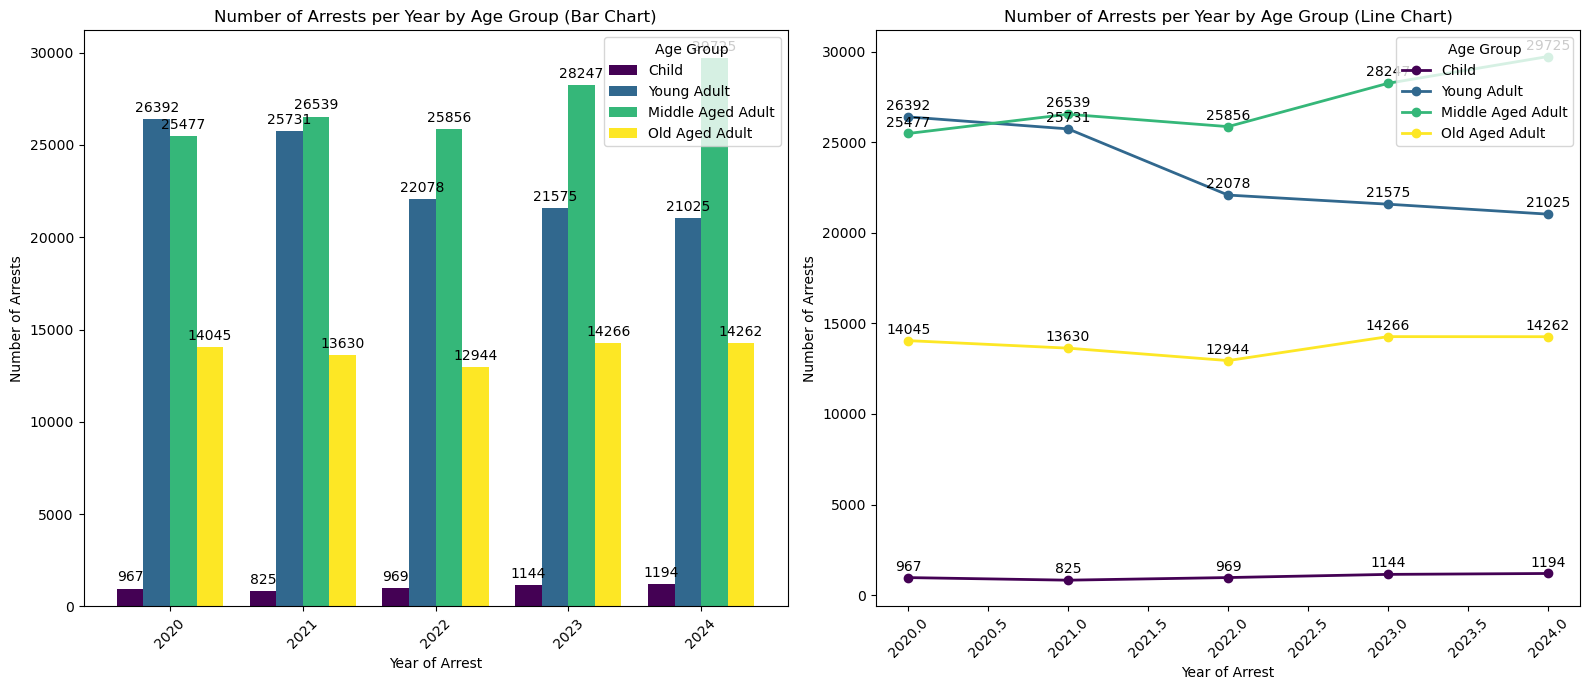

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create age groups based on the provided bins and labels
filtered_df['Age Group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Arrest Year' and 'Age Group' to count the arrests
arrest_counts_by_age = filtered_df.groupby(['Arrest Year', 'Age Group']).size().unstack(fill_value=0)

# Filter to keep only full years (integer years)
arrest_counts_by_age = arrest_counts_by_age[arrest_counts_by_age.index % 1 == 0]

# Plotting bar and line graphs side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Bar graph
bar_plot = arrest_counts_by_age.plot(kind='bar', colormap='viridis', width=0.8, ax=ax[0])
ax[0].set_title('Number of Arrests per Year by Age Group (Bar Chart)')
ax[0].set_xlabel('Year of Arrest')
ax[0].set_ylabel('Number of Arrests')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Age Group')

# Add numerical labels on the bar chart
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Line graph
line_plot = arrest_counts_by_age.plot(kind='line', colormap='viridis', marker='o', linewidth=2, ax=ax[1])
ax[1].set_title('Number of Arrests per Year by Age Group (Line Chart)')
ax[1].set_xlabel('Year of Arrest')
ax[1].set_ylabel('Number of Arrests')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Age Group')

# Add numerical labels on the line chart
for i, line in enumerate(line_plot.get_lines()):
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        ax[1].annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\3940154979.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)


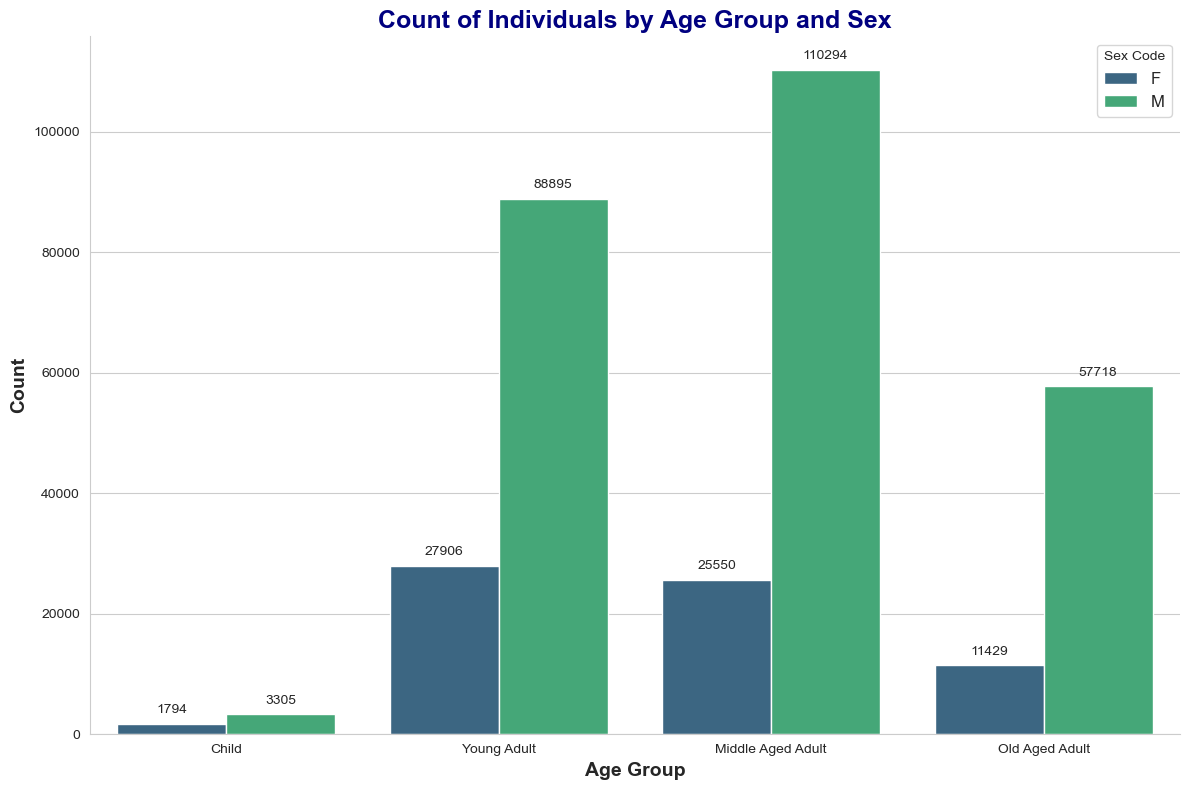

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Columns to keep
columns_to_keep = ['Report ID','Report Type','Arrest Date','Time','Area ID','Area Name','Sex Code', 'Age','Charge Group Description','Address']
filtered_df = arrest_df[columns_to_keep]

# Create age groups from the 'Age' column
age_bins = [0, 16, 30, 45, 100]
age_labels = ['Child', 'Young Adult', 'Middle Aged Adult', 'Old Aged Adult']
filtered_df['age_group'] = pd.cut(filtered_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of occurrences in each age group, separated by sex
age_group_counts = filtered_df.groupby(['age_group', 'Sex Code']).size().reset_index(name='count')

# Plot the counts of each age group by sex
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='age_group', y='count', hue='Sex Code', data=age_group_counts, palette='viridis')

plt.title('Count of Individuals by Age Group and Sex', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Adding data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.despine()  # Remove the top and right spines from plot
plt.legend(title='Sex Code', fontsize=12)
plt.tight_layout()
plt.show()


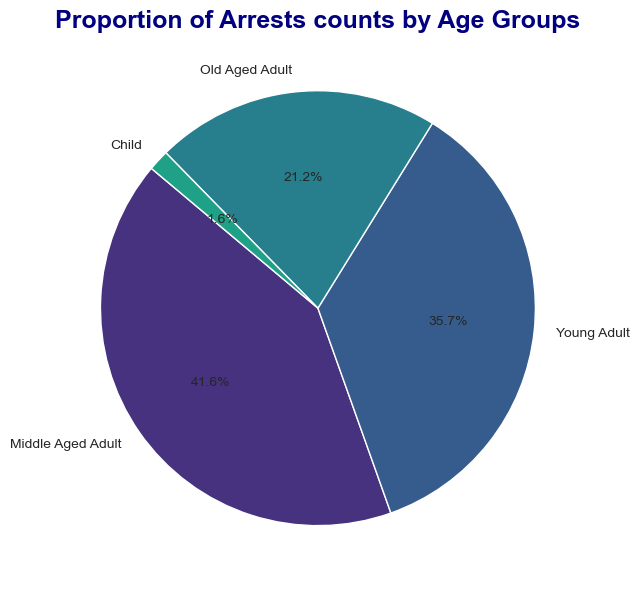

In [20]:
# Pie chart - Proportion of Age Groups
plt.figure(figsize=(10, 6))
age_group_pie = filtered_df['age_group'].value_counts()
age_group_pie.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportion of Arrests counts by Age Groups', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()

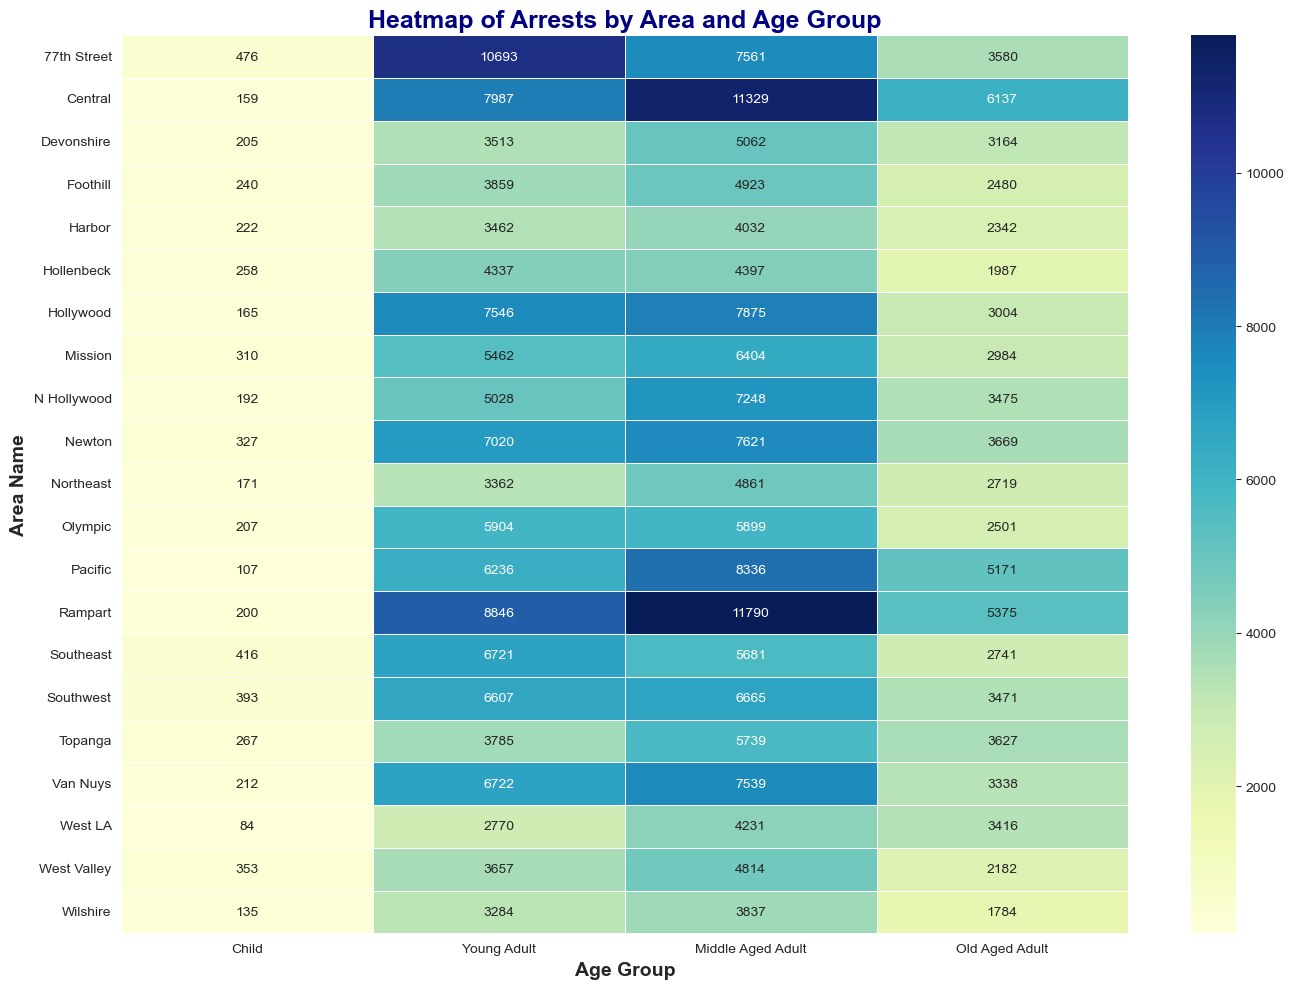

In [21]:
# Heatmap - Arrests by Area and Age Group
pivot_table = filtered_df.pivot_table(index='Area Name', columns='age_group', values='Report ID', aggfunc='count').fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Arrests by Area and Age Group', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Area Name', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# Columns to keep
columns_to_keep = ['Report ID','Report Type','Arrest Date','Time','Area ID','Area Name','Sex Code', 'Age','Charge Group Description','Address']
filtered_df = arrest_df[columns_to_keep]

# Get distinct values from 'Area Name'
distinct_areas = filtered_df['Area Name'].unique()
print("Distinct Area Names:")
print(distinct_areas)

Distinct Area Names:
['West LA' 'Southwest' 'Wilshire' 'Rampart' '77th Street' 'Mission'
 'Pacific' 'Central' 'Devonshire' 'N Hollywood' 'Olympic' 'Van Nuys'
 'Northeast' 'Foothill' 'Harbor' 'Hollywood' 'Southeast' 'Topanga'
 'West Valley' 'Hollenbeck' 'Newton']


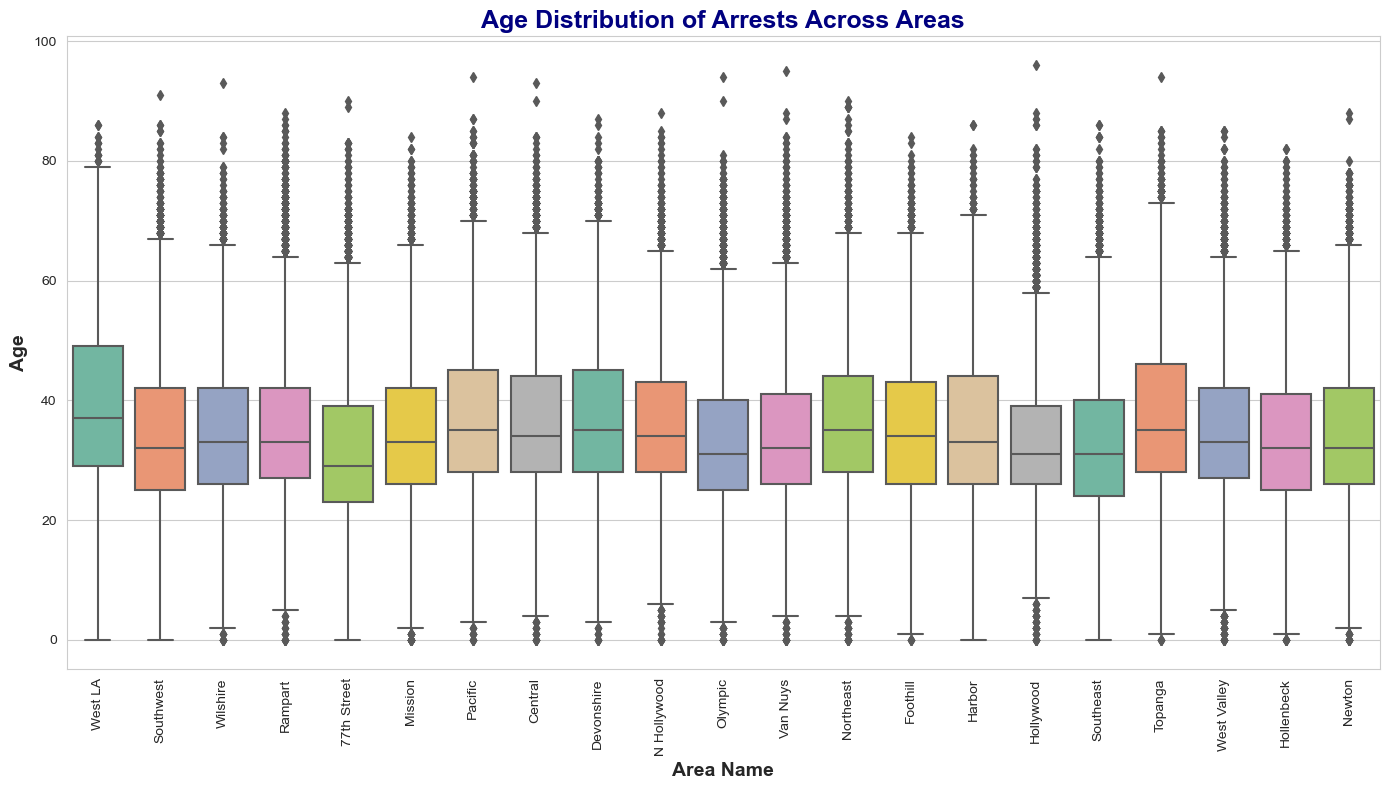

In [23]:
# Boxplot of 'Age' by 'Area Name'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Area Name', y='Age', data=filtered_df, palette='Set2')
plt.title('Age Distribution of Arrests Across Areas', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Area Name', fontsize=14, fontweight='bold')
plt.ylabel('Age', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


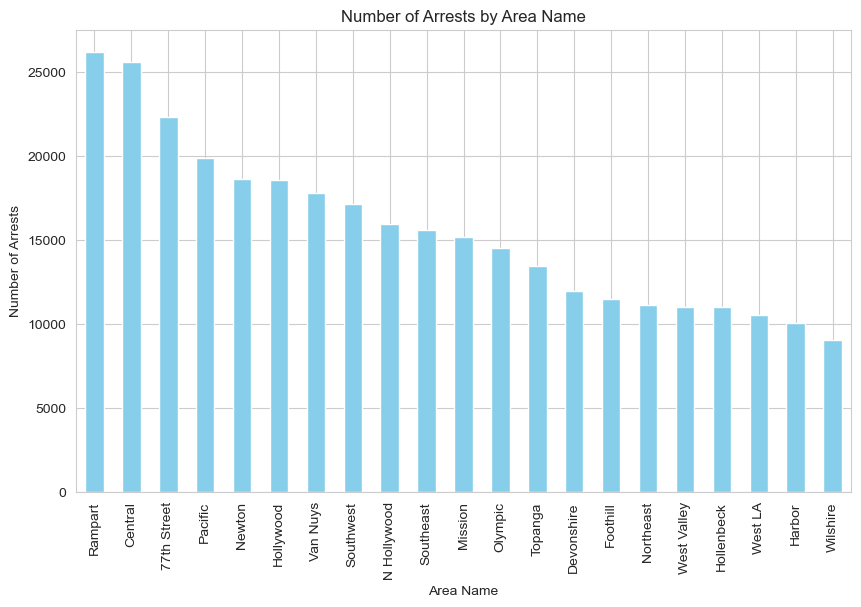

In [24]:
import matplotlib.pyplot as plt
#Arrest by Area Name
area_counts = filtered_df['Area Name'].value_counts()

plt.figure(figsize=(10,6))
area_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Arrests by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=90)
plt.show()


In [30]:
#print(crimedata_df.head(5))
columns_to_keep_crime = ['DR_NO','Date Rptd','DATE OCC','TIME OCC','AREA','AREA NAME','Rpt Dist No', 'Vict Age','Vict Sex','Status Desc','LOCATION']


filtered_df_crime = crimedata_df[columns_to_keep_crime]
#arrest_df_new = arrest_df[['Sex Code', 'Age']]
print(filtered_df_crime.head(5))

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   

    AREA NAME  Rpt Dist No  Vict Age Vict Sex   Status Desc  \
0    Wilshire          784         0        M  Adult Arrest   
1     Central          182        47        M   Invest Cont   
2   Southwest          356        19        X   Invest Cont   
3    Van Nuys          964        19        M   Invest Cont   
4  Hollenbeck          413         0            Invest Cont   

                                   LOCATION  
0   1900 S  LONGWOOD                     AV  
1   1000 S  FLOWER                       ST  
2 

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\537577237.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_crime['age_group'] = pd.cut(filtered_df_crime['Vict Age'], bins=age_bins, labels=age_labels, right=False)


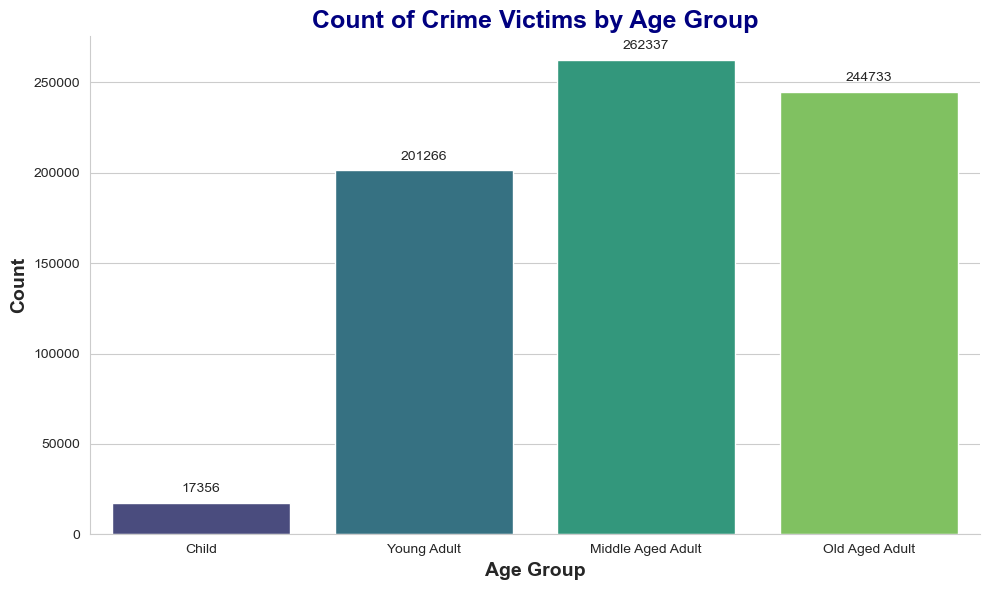

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Columns to keep for crime data
columns_to_keep_crime = ['DR_NO','Date Rptd','DATE OCC','TIME OCC','AREA','AREA NAME','Rpt Dist No', 'Vict Age','Vict Sex','Status Desc','LOCATION']
filtered_df_crime = crimedata_df[columns_to_keep_crime]

# Create age groups from the 'Vict Age' column
age_bins = [1, 16, 30, 45, 100]
age_labels = ['Child', 'Young Adult', 'Middle Aged Adult', 'Old Aged Adult']
filtered_df_crime['age_group'] = pd.cut(filtered_df_crime['Vict Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of occurrences in each age group
age_group_counts_crime = filtered_df_crime['age_group'].value_counts().sort_index()

# Plot the counts of each age group for crime data
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=age_group_counts_crime.index, y=age_group_counts_crime.values, palette='viridis')

# Set the title and labels
plt.title('Count of Crime Victims by Age Group', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Adding data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

# Remove top and right spines from plot
sns.despine()

# Ensure the x-axis labels are placed below the bars
plt.xticks(rotation=0, ha='center')  # Set the x-ticks to display horizontally

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


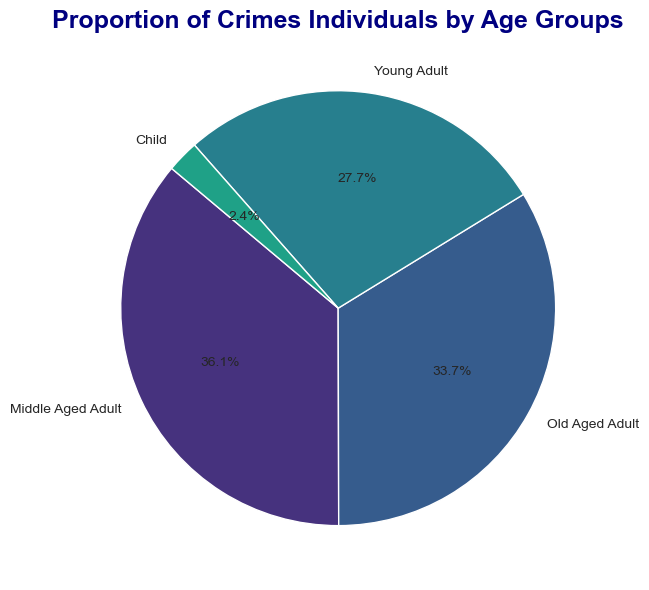

In [32]:
plt.figure(figsize=(10, 6))
age_group_pie = filtered_df_crime['age_group'].value_counts()
age_group_pie.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportion of Crimes Individuals by Age Groups', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()

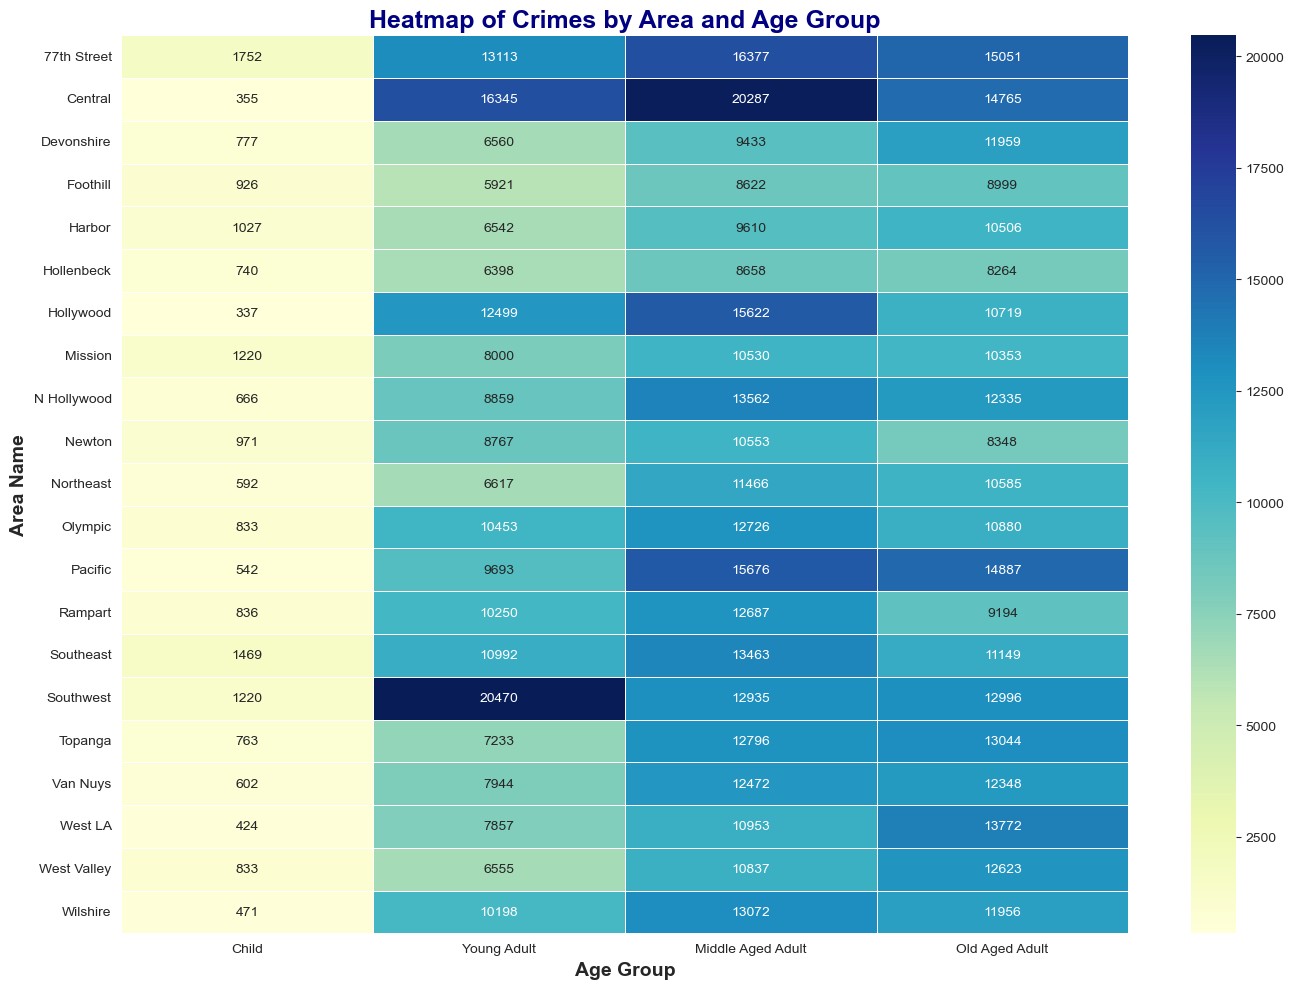

In [35]:
# Heatmap - Arrests by Area and Age Group
pivot_table = filtered_df_crime.pivot_table(index='AREA NAME', columns='age_group', values='DR_NO', aggfunc='count').fillna(0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Crimes by Area and Age Group', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Area Name', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

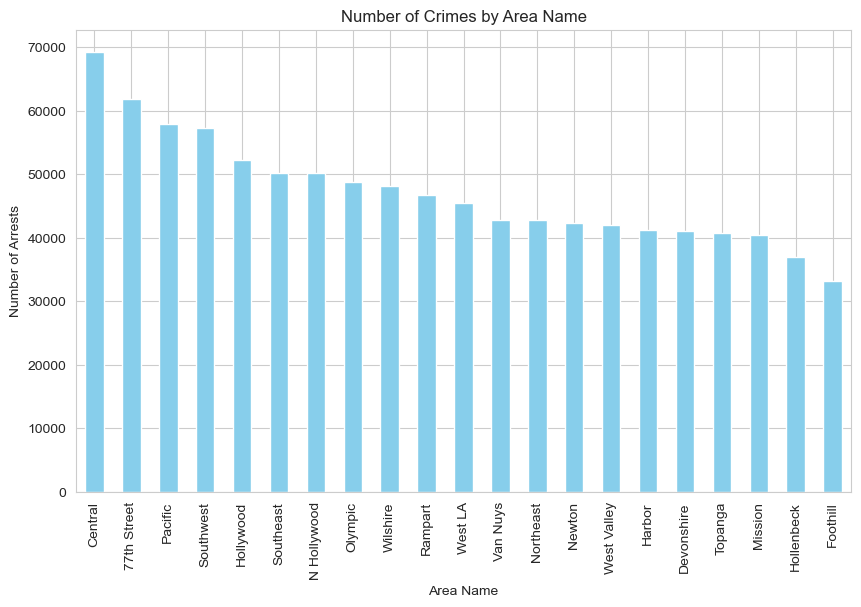

In [36]:
import matplotlib.pyplot as plt
#Crimes by Area Name
area_counts = filtered_df_crime['AREA NAME'].value_counts()

plt.figure(figsize=(10,6))
area_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=90)
plt.show()

In [44]:
print(filtered_df_crime.head(5))
print(filtered_df.head(5))

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   

    AREA NAME  Rpt Dist No  Vict Age Vict Sex   Status Desc  \
0    Wilshire          784         0        M  Adult Arrest   
1     Central          182        47        M   Invest Cont   
2   Southwest          356        19        X   Invest Cont   
3    Van Nuys          964        19        M   Invest Cont   
4  Hollenbeck          413         0            Invest Cont   

                                   LOCATION       age_group  
0   1900 S  LONGWOOD                     AV             NaN  
1   1000 S  FLOW

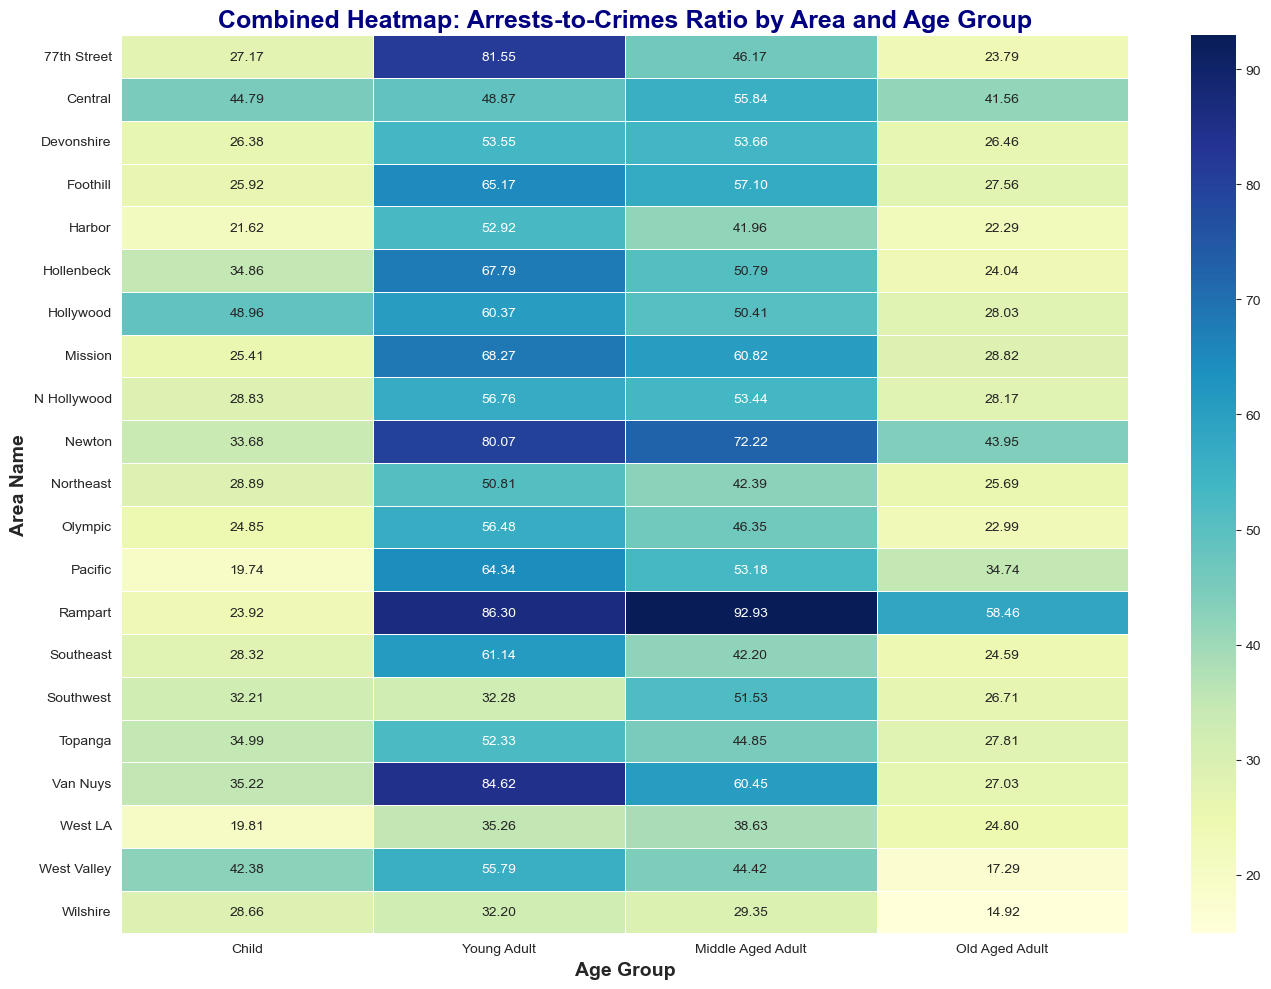

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot table for Crimes by Area and Age Group
pivot_crime = filtered_df_crime.pivot_table(
    index='AREA NAME', 
    columns='age_group', 
    values='DR_NO', 
    aggfunc='count'
).fillna(0)

# Pivot table for Arrests by Area and Age Group
pivot_arrests = filtered_df.pivot_table(
    index='Area Name', 
    columns='age_group', 
    values='Report ID', 
    aggfunc='count'
).fillna(0)

# Ensure both datasets are aligned
pivot_crime = pivot_crime.sort_index()
pivot_arrests = pivot_arrests.sort_index()

# Calculate Arrests-to-Crimes Ratio (Avoid division by zero)
combined_heatmap = pivot_arrests / pivot_crime.replace(0, np.nan) * 100

# Plotting the Combined Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(combined_heatmap, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Combined Heatmap: Arrests-to-Crimes Ratio by Area and Age Group', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Area Name', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


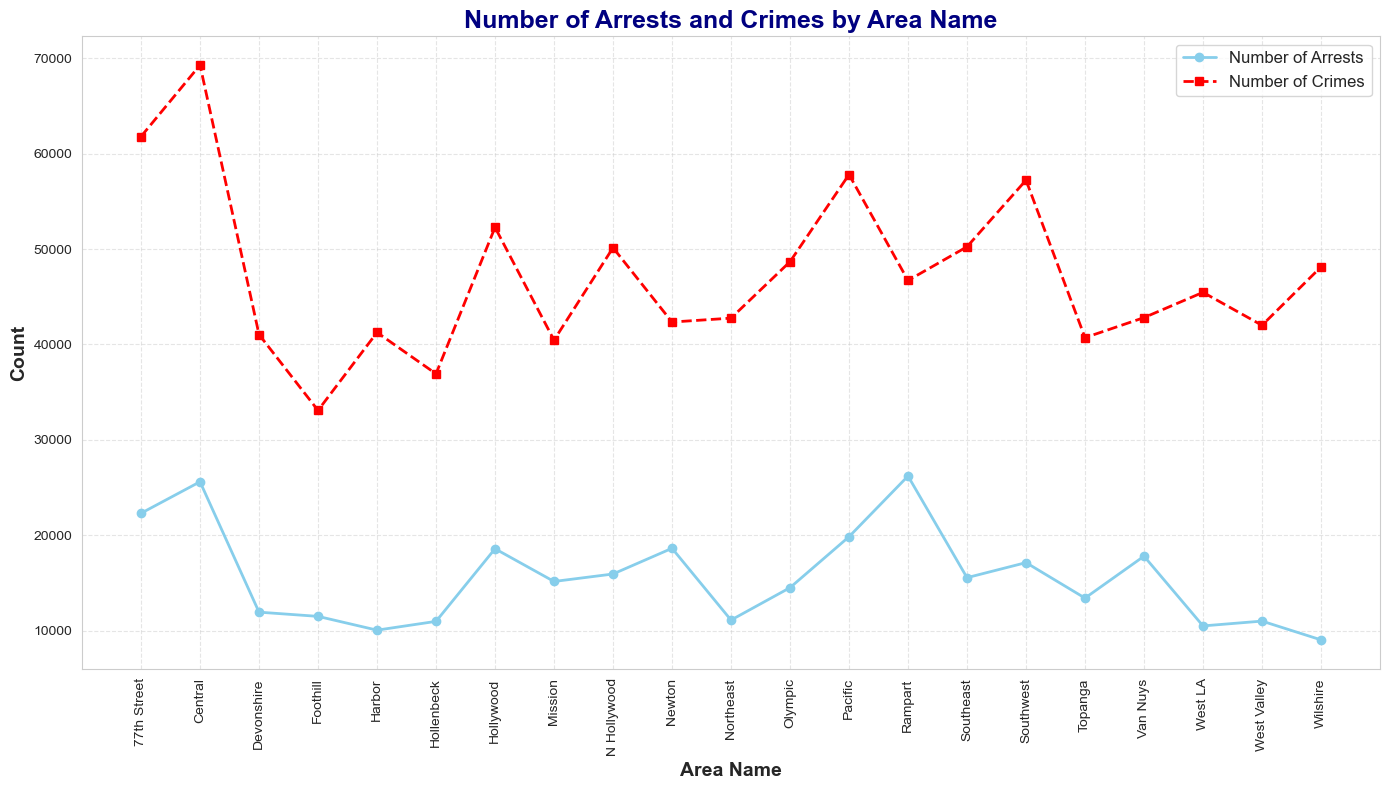

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Count Arrests by Area Name
arrest_counts = filtered_df['Area Name'].value_counts().sort_index()

# Count Crimes by Area Name
crime_counts = filtered_df_crime['AREA NAME'].value_counts().sort_index()

# Ensure both datasets have the same index
combined_data = pd.DataFrame({
    'Number of Arrests': arrest_counts,
    'Number of Crimes': crime_counts
}).fillna(0)  # Fill missing values with 0 if areas mismatch

# Plot Dual-Line Chart
plt.figure(figsize=(14, 8))

# Plot Arrests as a line
plt.plot(
    combined_data.index, 
    combined_data['Number of Arrests'], 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Number of Arrests', 
    color='skyblue'
)

# Plot Crimes as a line
plt.plot(
    combined_data.index, 
    combined_data['Number of Crimes'], 
    marker='s', 
    linestyle='--', 
    linewidth=2, 
    label='Number of Crimes', 
    color='red'
)

# Titles and labels
plt.title('Number of Arrests and Crimes by Area Name', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Area Name', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)

# Legend
plt.legend(fontsize=12)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 1400x600 with 0 Axes>

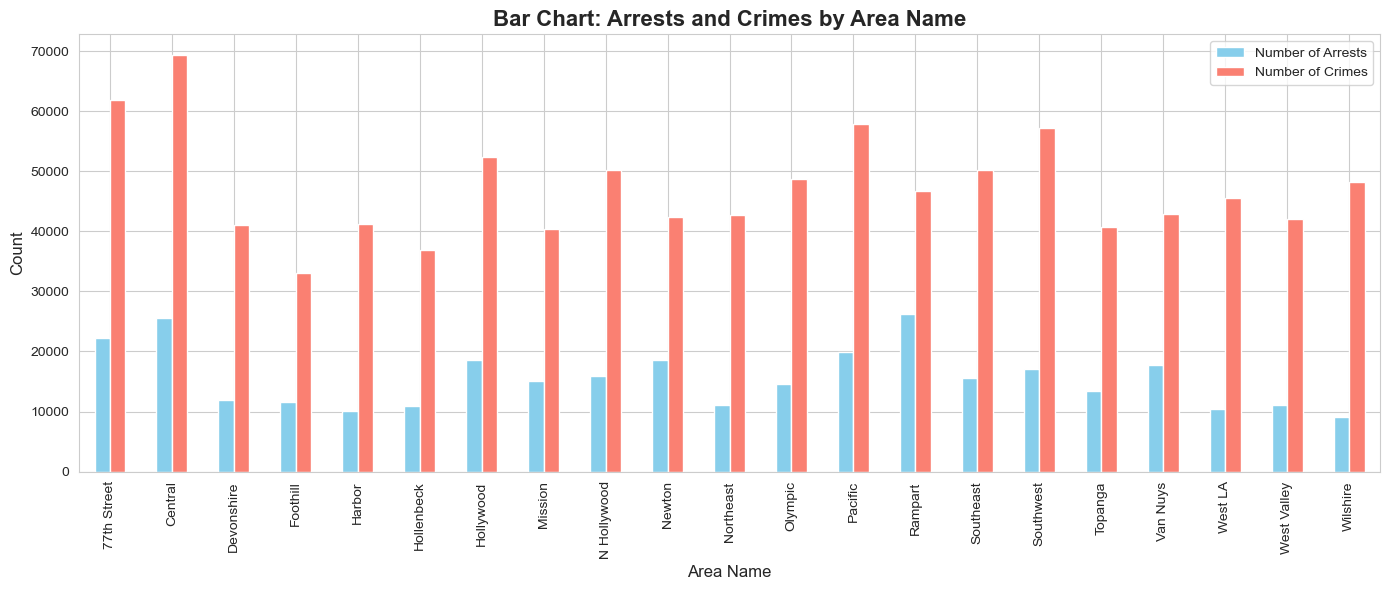

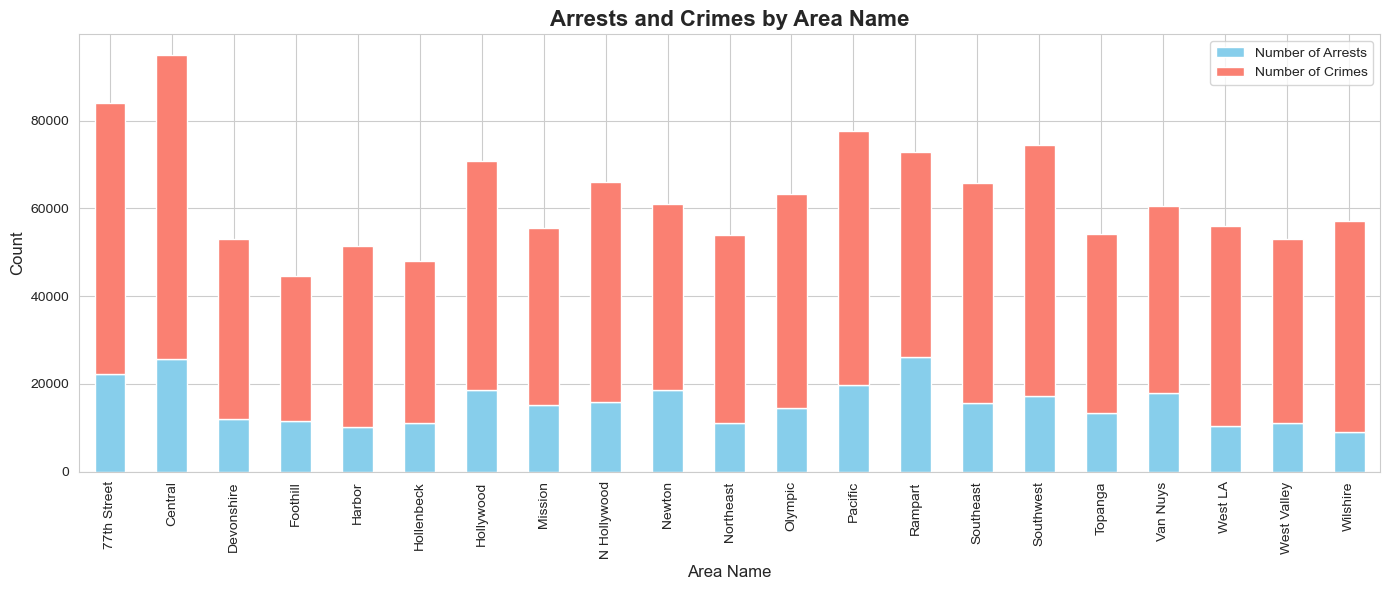

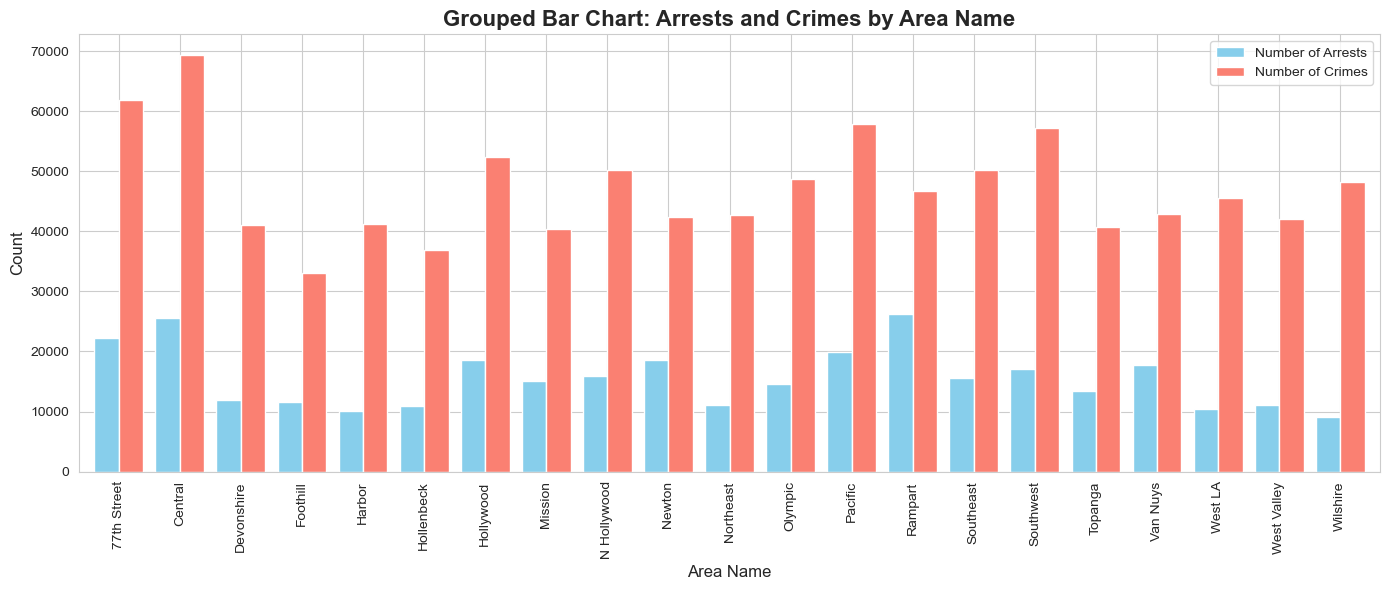

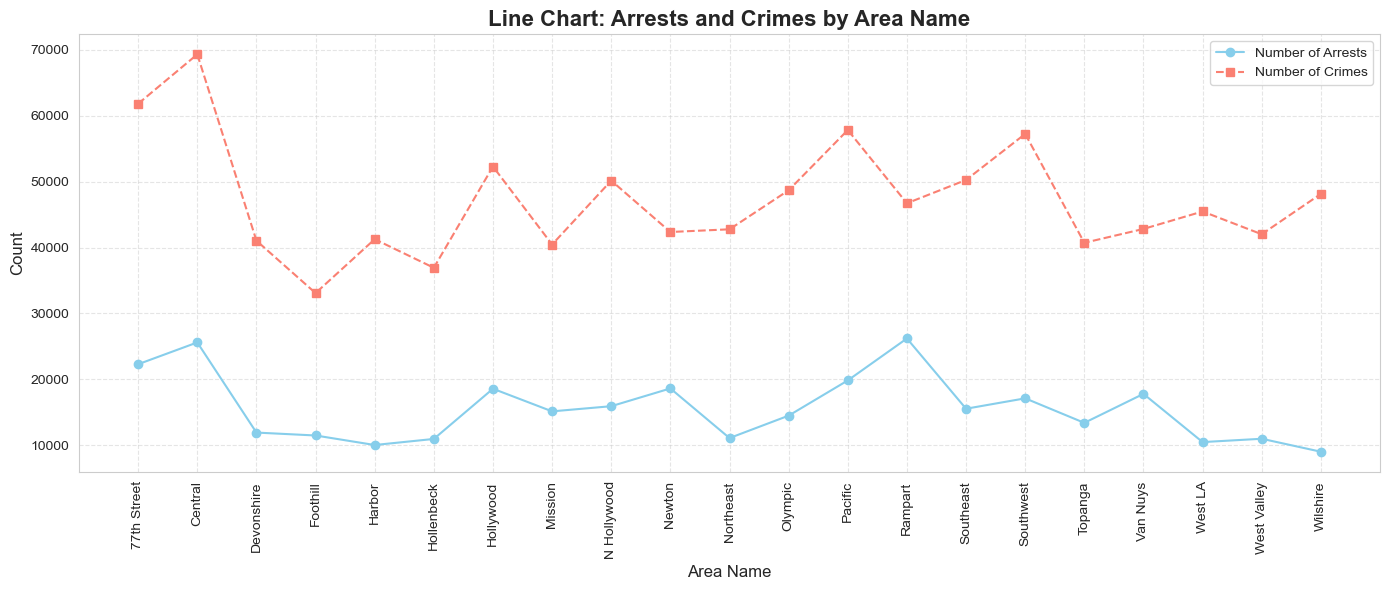

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Count Arrests by Area Name
arrest_counts = filtered_df['Area Name'].value_counts().sort_index()

# Count Crimes by Area Name
crime_counts = filtered_df_crime['AREA NAME'].value_counts().sort_index()

# Ensure both datasets have the same index
combined_data = pd.DataFrame({
    'Number of Arrests': arrest_counts,
    'Number of Crimes': crime_counts
}).fillna(0)  # Fill missing values with 0 if areas mismatch

# 1. Bar Chart
plt.figure(figsize=(14, 6))
combined_data.plot(kind='bar', figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title('Bar Chart: Arrests and Crimes by Area Name', fontsize=16, fontweight='bold')
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 2. Stacked Bar Chart
combined_data.plot(kind='bar', stacked=True, figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title('Arrests and Crimes by Area Name', fontsize=16, fontweight='bold')
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 3. Grouped Bar Chart (Side-by-Side)
combined_data.plot(kind='bar', width=0.8, figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title('Grouped Bar Chart: Arrests and Crimes by Area Name', fontsize=16, fontweight='bold')
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 4. Line Chart
plt.figure(figsize=(14, 6))
plt.plot(combined_data.index, combined_data['Number of Arrests'], marker='o', linestyle='-', color='skyblue', label='Number of Arrests')
plt.plot(combined_data.index, combined_data['Number of Crimes'], marker='s', linestyle='--', color='salmon', label='Number of Crimes')
plt.title('Line Chart: Arrests and Crimes by Area Name', fontsize=16, fontweight='bold')
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



plt.tight_layout()
plt.show()


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\238349169.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df_crime['Date Rptd'] = pd.to_datetime(filtered_df_crime['Date Rptd'], errors='coerce')
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\238349169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_crime['Date Rptd'] = pd.to_datetime(filtered_df_crime['Date Rptd'], errors='coerce')
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_12552\238349169.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

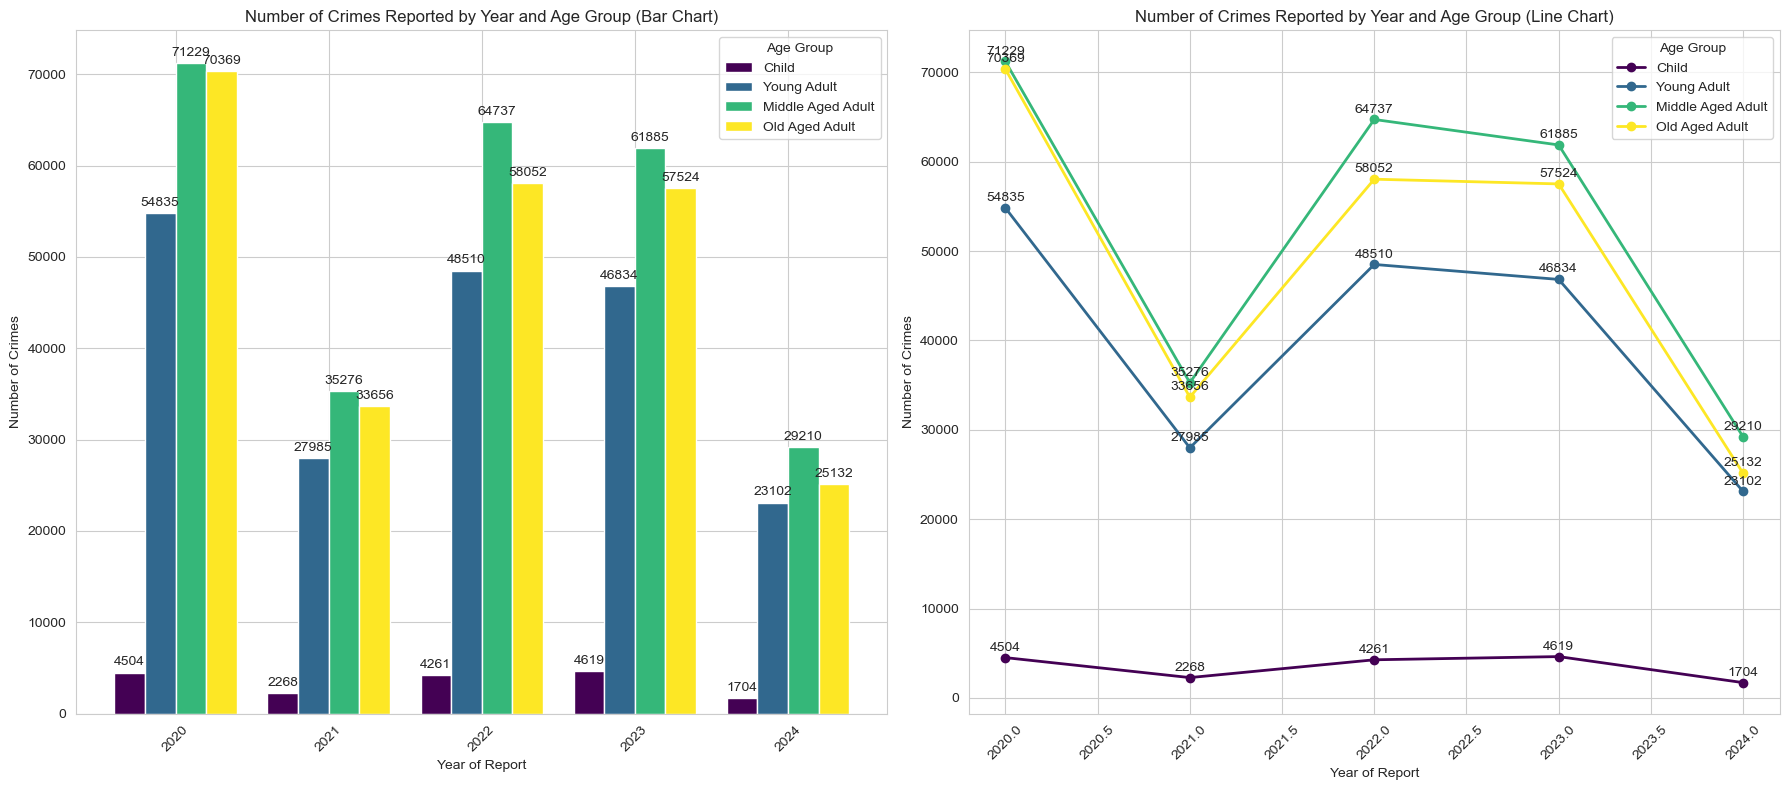

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Keep specific columns from the crime data
columns_to_keep_crime = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 
                         'Rpt Dist No', 'Vict Age', 'Vict Sex', 'Status Desc', 'LOCATION']
filtered_df_crime = crimedata_df[columns_to_keep_crime]

# Convert 'Date Rptd' to datetime format
filtered_df_crime['Date Rptd'] = pd.to_datetime(filtered_df_crime['Date Rptd'], errors='coerce')

# Extract the year from 'Date Rptd'
filtered_df_crime['Year'] = filtered_df_crime['Date Rptd'].dt.year

# Create age groups from the 'Vict Age' column
age_bins = [1, 16, 30, 45, 100]
age_labels = ['Child', 'Young Adult', 'Middle Aged Adult', 'Old Aged Adult']

# Create age groups
filtered_df_crime['Age Group'] = pd.cut(filtered_df_crime['Vict Age'], bins=age_bins, 
                                        labels=age_labels, right=False)

# Group by year and age group to count the number of crimes
crime_counts_by_year_age = filtered_df_crime.groupby(['Year', 'Age Group']).size().unstack(fill_value=0)

# Remove rows with NaN (in case of invalid dates)
crime_counts_by_year_age = crime_counts_by_year_age.dropna()

# Plotting bar and line graphs side by side
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar graph
bar_plot = crime_counts_by_year_age.plot(kind='bar', colormap='viridis', width=0.8, ax=ax[0])
ax[0].set_title('Number of Crimes Reported by Year and Age Group (Bar Chart)')
ax[0].set_xlabel('Year of Report')
ax[0].set_ylabel('Number of Crimes')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Age Group')

# Add numerical labels to bar graph
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Line graph
line_plot = crime_counts_by_year_age.plot(kind='line', colormap='viridis', marker='o', linewidth=2, ax=ax[1])
ax[1].set_title('Number of Crimes Reported by Year and Age Group (Line Chart)')
ax[1].set_xlabel('Year of Report')
ax[1].set_ylabel('Number of Crimes')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Age Group')

# Add numerical labels to line graph
for i, line in enumerate(line_plot.get_lines()):
    y_data = line.get_ydata()
    x_data = line.get_xdata()
    for x, y in zip(x_data, y_data):
        ax[1].annotate(f'{int(y)}', (x, y), 
                       textcoords="offset points", xytext=(0, 5), ha='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
